Fetching NVIDIA stock data from 2024-03-31 to 2025-03-31
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



Downloaded 251 days of NVIDIA stock data
Date range: 2024-04-01 to 2025-03-31

First 5 rows of data:
Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2024-04-01  90.333313  92.194701  89.174697  90.269339  452441000
2024-04-02  89.422615  90.064402  87.591216  88.418939  433064000
2024-04-03  88.934776  90.344317  88.370966  88.454938  370067000
2024-04-04  85.876778  90.604228  85.851784  90.376298  434965000
2024-04-05  87.979088  88.451932  85.897771  86.837457  399678000
Price chart saved as nvda_price_chart.png


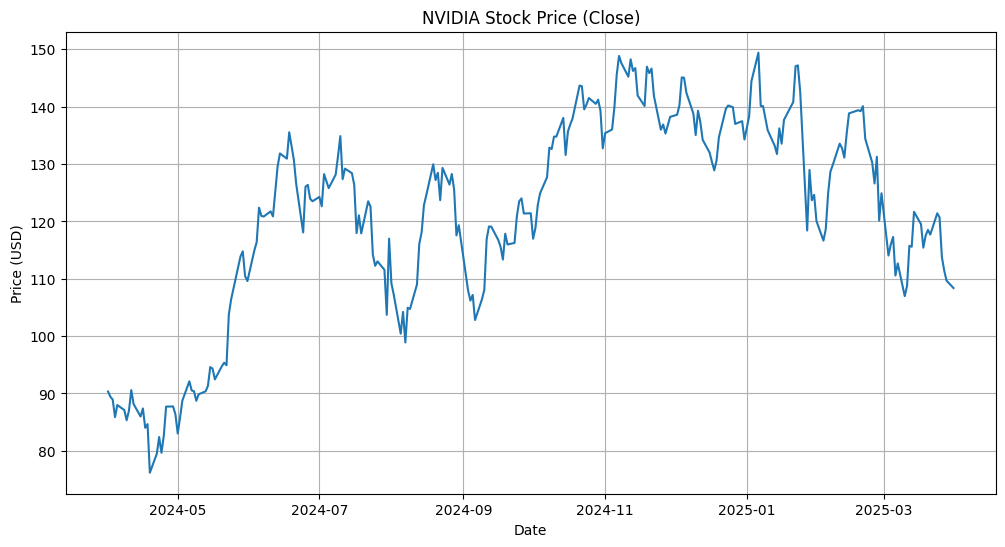

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set date range for the data (last 2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

print(f"Fetching NVIDIA stock data from {start_date.date()} to {end_date.date()}")

# Fetch NVIDIA stock data
nvda = yf.download('NVDA', start=start_date, end=end_date)

# Display basic information
print(f"\nDownloaded {len(nvda)} days of NVIDIA stock data")
print(f"Date range: {nvda.index.min().date()} to {nvda.index.max().date()}\n")

# Display the first few rows
print("First 5 rows of data:")
print(nvda.head())


Price chart saved as nvda_price_chart.png


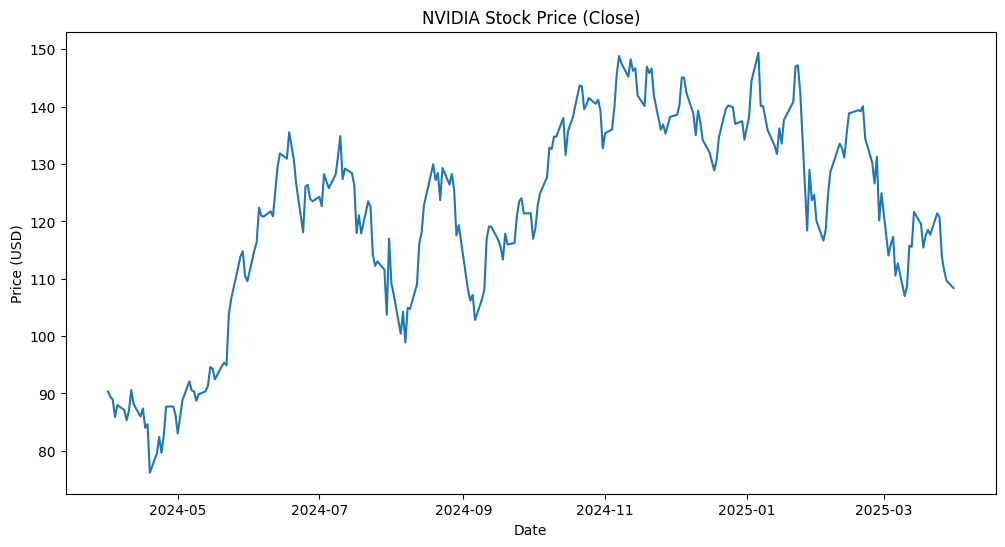

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(nvda.index, nvda['Close'])
plt.title('NVIDIA Stock Price (Close)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(False)
plt.savefig('nvda_price_chart.png')
plt.show()


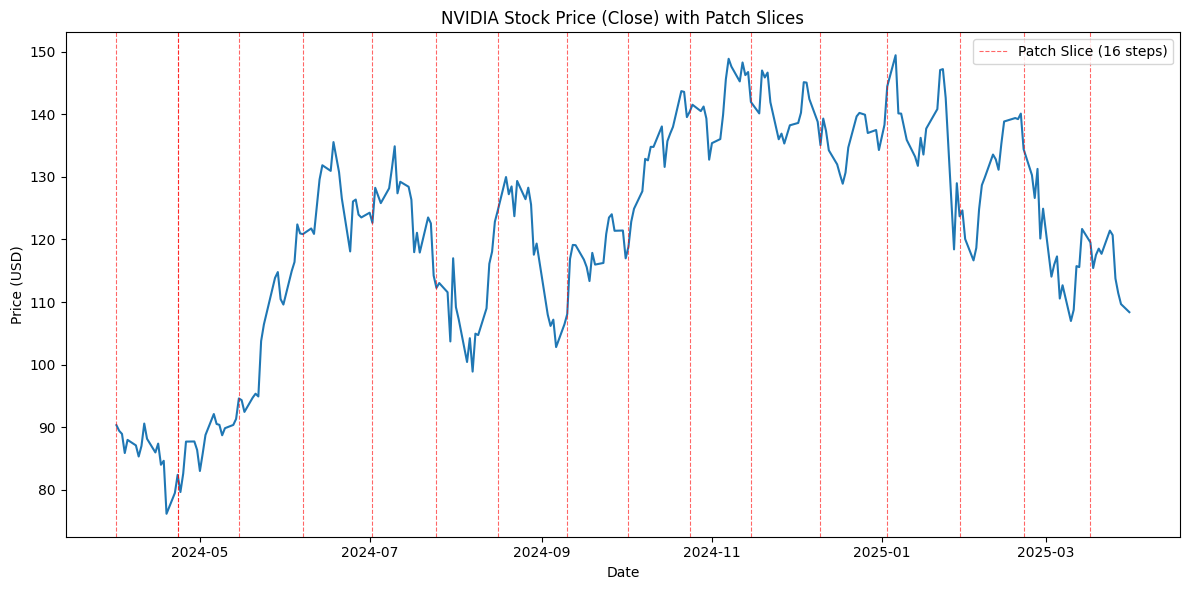

In [7]:
plt.figure(figsize=(12, 6))

# Plot the stock data
plt.plot(nvda.index, nvda['Close'])

# Add vertical patch lines every 16 time steps
for i in range(0, len(nvda), 16):
    if i < len(nvda):
        plt.axvline(x=nvda.index[i], color='red', linestyle='--', alpha=0.6, linewidth=0.8)

# Add one labeled line for the legend
plt.axvline(x=nvda.index[16] if len(nvda) > 16 else nvda.index[0], 
            color='red', linestyle='--', alpha=0.6, linewidth=0.8, 
            label='Patch Slice (16 steps)')

plt.title('NVIDIA Stock Price (Close) with Patch Slices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.savefig('nvda_price_chart_patches.png')
plt.show()

In [8]:
# Function to create separate images for each patch
def create_patch_images(data, series_col='Close', patch_size=16, output_dir='patches'):
    import os
    import matplotlib.pyplot as plt
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Calculate number of patches
    num_patches = len(data) // patch_size
    
    # Create separate image for each patch
    for i in range(num_patches):
        # Get start and end indices for this patch
        start_idx = i * patch_size
        end_idx = start_idx + patch_size
        
        # Skip if we don't have enough data for a full patch
        if end_idx >= len(data):
            break
            
        # Extract data for this patch
        patch_data = data.iloc[start_idx:end_idx]
        
        # Create figure for this patch
        plt.figure(figsize=(8, 4))
        plt.plot(patch_data.index, patch_data[series_col])
        
        # Add patch information
        plt.title(f'Patch {i+1}: {patch_data.index[0].date()} to {patch_data.index[-1].date()}')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.grid(False)
        
        # Optional: Add vertical line at the beginning and end of patch
        plt.axvline(x=patch_data.index[0], color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=patch_data.index[-1], color='gray', linestyle='--', alpha=0.5)
        
        # Make sure dates are displayed properly
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f'{output_dir}/patch_{i+1:03d}.png')
        plt.close()  # Close to free memory
    
    print(f"Created {num_patches} patch images in '{output_dir}' directory")

# Using the function with your NVDA data
create_patch_images(nvda, patch_size=16, output_dir='nvda_patches')

Created 15 patch images in 'nvda_patches' directory


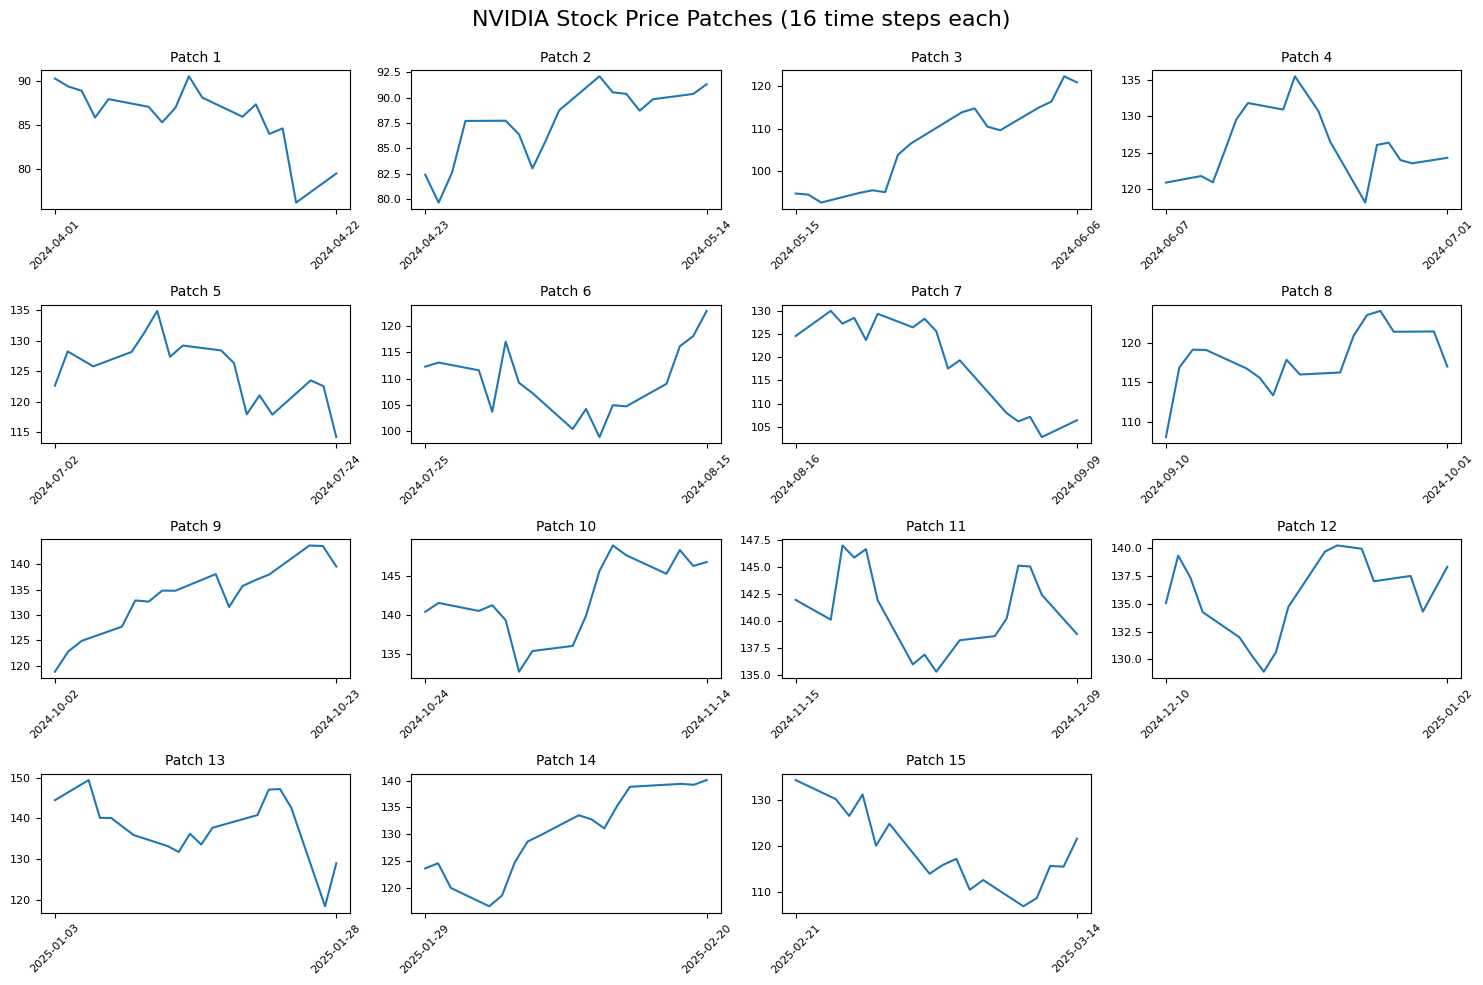

In [11]:
def plot_patches_grid(data, series_col='Close', patch_size=16, figsize=(15, 10)):
    import matplotlib.pyplot as plt
    import math
    
    # Calculate number of patches
    num_patches = len(data) // patch_size
    
    # Determine grid dimensions
    # Try to make it roughly square-ish
    grid_cols = math.ceil(math.sqrt(num_patches))
    grid_rows = math.ceil(num_patches / grid_cols)
    
    # Create figure and subplots
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=figsize)
    
    # Flatten axes array for easy indexing
    if grid_rows > 1 and grid_cols > 1:
        axes = axes.flatten()
    elif grid_rows == 1:
        axes = [axes] if grid_cols == 1 else axes
    elif grid_cols == 1:
        axes = [axes] if grid_rows == 1 else axes
    
    # Global y-limits for consistent scaling (optional)
    # y_min = data[series_col].min() * 0.95
    # y_max = data[series_col].max() * 1.05
    
    # Plot each patch
    for i in range(num_patches):
        # Get start and end indices for this patch
        start_idx = i * patch_size
        end_idx = start_idx + patch_size
        
        # Skip if we don't have enough data for a full patch
        if end_idx > len(data):
            break
            
        # Extract data for this patch
        patch_data = data.iloc[start_idx:end_idx]
        
        # Plot on the corresponding subplot
        axes[i].plot(patch_data.index, patch_data[series_col])
        
        # Set title and format
        axes[i].set_title(f'Patch {i+1}', fontsize=10)
        
        # Format dates nicely - show only first and last date
        axes[i].set_xticks([patch_data.index[0], patch_data.index[-1]])
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)
        
        # # Optionally use consistent y-scale
        # axes[i].set_ylim(y_min, y_max)
        
        # Remove grid
        axes[i].grid(False)
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    # Add overall title and adjust layout
    fig.suptitle('NVIDIA Stock Price Patches (16 time steps each)', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Make room for suptitle
    
    return fig

# Create the grid of patches
fig = plot_patches_grid(nvda, patch_size=16, figsize=(15, 10))
plt.show()

In [ ]:
# Visualize the patch embeddings
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt

# Step 1: Extract the closing prices and convert to numpy array
close_prices = nvda['Close'].values

# Step 2: Create patches of length 16
patch_size = 16
num_complete_patches = len(close_prices) // patch_size

# Create the patches (reshape data into segments of 16)
patches = []
for i in range(num_complete_patches):
    start_idx = i * patch_size
    end_idx = start_idx + patch_size
    patch = close_prices[start_idx:end_idx]
    patches.append(patch)

# Convert to numpy array for easier manipulation
patches = np.array(patches)
print(f"Created {len(patches)} patches of length {patch_size}")
print(f"Patches shape: {patches.shape}")  # Should be (num_patches, 16)

# Step 3: Create a random projection matrix for the linear projection
# The projection matrix should be (16, 256) for matrix multiplication to work
np.random.seed(42)  # For reproducibility
projection_matrix = np.random.randn(16, 256)  # Make sure dimensions match
print(f"Projection matrix shape: {projection_matrix.shape}")

# Step 4: Project each patch to 256 dimensions
# Matrix multiplication: (num_patches, 16) × (16, 256) = (num_patches, 256)
# Reshape patches if needed
if len(patches.shape) == 1:
    patches = patches.reshape(-1, patch_size)
print(f"Reshaped patches shape: {patches.shape}")

projected_patches = np.matmul(patches, projection_matrix)
print(f"Projected patches shape: {projected_patches.shape}")  # Should be (num_patches, 256)


# Optional: Visualize the first few projected dimensions of the first few patches
plt.figure(figsize=(12, 6))
for i in range(min(5, len(projected_patches))):
    plt.plot(projected_patches[i, :20], label=f'Patch {i+1} (first 20 dimensions)')
plt.title('First 20 Dimensions of the First 5 Projected Patches')
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Let's see how similar the patches are in the projected space
# by computing a simple correlation matrix of the first 10 patches
if len(projected_patches) >= 10:
    first_10_patches = projected_patches[:10]
    correlation_matrix = np.corrcoef(first_10_patches)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(label='Correlation')
    plt.title('Correlation Between First 10 Projected Patches')
    plt.xlabel('Patch Index')
    plt.ylabel('Patch Index')
    for i in range(10):
        for j in range(10):
            plt.text(j, i, f'{correlation_matrix[i, j]:.2f}', 
                     ha='center', va='center', 
                     color='white' if abs(correlation_matrix[i, j]) > 0.5 else 'black')
    plt.tight_layout()
    plt.show()

NameError: name 'nvda' is not defined